# **IMPORTING NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# **LOADING THE DATA AND READING THE CONTENT**

In [ ]:
file_path = '/content/spam.csv'
data = pd.read_csv(file_path)

# **CLEANING & PROCESSING THE DATA**

In [ ]:
# Cheking for unecessary columns and removing it
data = data[['text', 'label_num']]

# Cheking the dataset for the missing values and fixing it
data.dropna(inplace=True)

# Removing the duplicates in the dataset for better accuracy
data.drop_duplicates(inplace=True)

# Cleaning the data using a user defined function
def clean_text(text):
    text = text.lower()  # Converting  to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove the 'Urls'
    text = re.sub(r'\W', ' ', text)  # Removing the special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Removing the extra spaces for better classification
    return text
data['text'] = data['text'].apply(clean_text)

# **PREPROCESSING THE DATA**

In [ ]:
# 'text' refers to the content of the mail
# 'label_num' refers to the classification of the mai
X = data['text']
y = data['label_num']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# **VECTORIZING THE TEXT TYPE DATA**

In [ ]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# **TRAINING THE MODEL VIA LOGISTIC REGRESSION**

In [ ]:
logistic_reg = LogisticRegression(solver='liblinear')
logistic_reg.fit(X_train_vec, y_train)

LogisticRegression(solver='liblinear')

# **EVALUVATING THE ACCURACY SCORE OF THE MODEL**

In [ ]:
y_pred = logistic_reg.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f'Accuracy of the Logistic Regression Model: {accuracy_percentage:.2f}%')

Accuracy of the Logistic Regression Model: 96.86%


# **PLOTTING THE ACCURACY PERCENTAGE AS BAR GRAPH AND CONFUSION MATRIX**

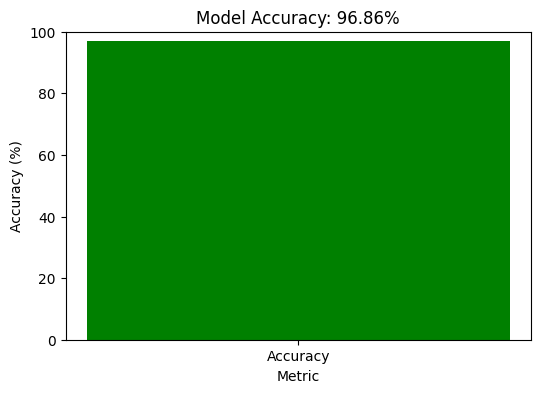

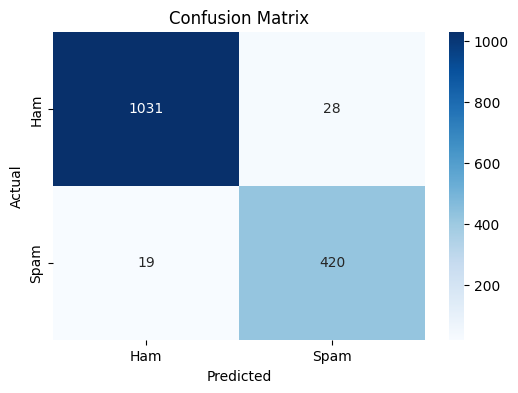

In [ ]:
# Plotting the accuracy as a bar chart using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy"], [accuracy_percentage], color='green')
plt.ylim(0, 100)
plt.xlabel("Metric")
plt.ylabel("Accuracy (%)")
plt.title(f"Model Accuracy: {accuracy_percentage:.2f}%")
plt.show()

# Here,I'm Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **DEPLOYMNET PROCESS**

In [ ]:
import pickle

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(logistic_reg, f)

['model.pkl']